## Libraríes
---

We import the necesary libraries to start the project

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import re
from sklearn.metrics import mean_squared_error

In [16]:
def customLoss(true,pred):
    diff = pred - true
    greater = np.max(diff)
    greater = greater + 1     
    return np.mean(diff**greater) 
    # return np.mean(greater*(diff**2))

float_numbers = [x/100 for x in range(1,301)]
lista_mse, lista_mse_2 = [], []
for i in float_numbers:
    lista_mse.append(mean_squared_error([0], [i]))
    lista_mse_2.append(customLoss(np.array([0]),np.array([i])))    

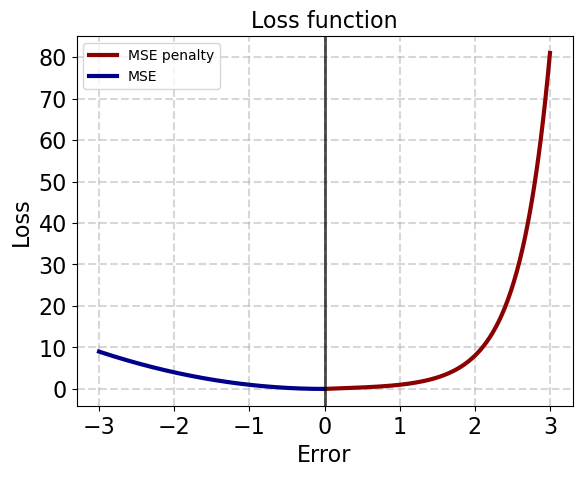

In [17]:
plt.plot(float_numbers, lista_mse_2, label='MSE penalty', color='darkred', linewidth=3)
plt.plot(-np.array(float_numbers), lista_mse, label='MSE', color='darkblue', linewidth=3)
plt.legend(), plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5, alpha = 0.5);
plt.xlabel('Error', fontsize=16), plt.ylabel('Loss', fontsize=16), plt.title('Loss function', fontsize=16);
plt.axvline(x=0, color='black', linewidth=2, alpha = 0.7);

Some functions are created so as to load data as a list of pandas dataframes

In [2]:
path = os.getcwd() + '\\Datos_baterias_csv'
cells = [f'\Cell{x}\*' for x in range(1, 9)]
palette = ['#264653','#2A9D8F','#3ECCBB','#E9C46A','#F4A261','#E76F51']
font = {'size': 20, 'color': 'black', 'weight': 'bold'}
def rutes(batery = 1): 
    cycles_path = glob.glob(path + f'\Cell{batery}\*')
    dictionay_values = {x: int(re.findall(r'\d+',x.split('\\')[-1])[0] ) for x in cycles_path}
    final_rute = list(dict(sorted(dictionay_values.items(), key=lambda item: item[1])).keys())
    return dictionay_values, final_rute
def archives(archive_num = 0, batery = 1): return glob.glob(rutes(batery)[1][archive_num]+ "\*.csv")
def csv_selector(csvv = 0, batery = 1): 
    values = [archives(archive_num = x, batery = batery)[csvv] for x in range(len(rutes(batery = batery)[1]))  ]
    return [pd.read_csv(x, sep = ',') for x in values]


Plot functions are created

In [3]:
def plotting_results(names,  validation, test, x = [0, 1]):
    X_axis = np.arange(len(names))
    fig1, ax1 = plt.subplots(figsize = (27, 8))
    plt.bar(X_axis - 0.1, validation, 0.2, color = palette[0], label = 'Charge')
    plt.bar(X_axis + 0.1, test, 0.2, color = palette[5], label = 'Discharge')
    plt.ylim(x[0], x[1]), plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5, alpha = 0.5);
    plt.xlabel('Cells', fontdict=font), plt.ylabel('Charge values', fontdict=font),  plt.title(f'Charge values differences', fontdict=font);
    for p in ax1.patches: plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=15)
    plt.legend(loc='upper right', fontsize=18, bbox_to_anchor=(1.12,1), borderaxespad=0);
    plt.show()

### Exploratory analysis
---

In [4]:
charge_every_cell, discharge_every_cell = [csv_selector(csvv = 0, batery = i) for i in range(1,9)], [csv_selector(csvv = 1, batery = i) for i in range(1,9)]

In [10]:
charge_every_cell[0][-1]

,t,v,q,T,SoC
0,736593.459683,2.745788,-0.000041,41.424446,-0.717022
1,736593.459694,2.876640,0.195546,41.449417,-0.717022
2,736593.459706,2.908721,0.401299,41.387009,-0.717022
3,736593.459718,2.931619,0.607052,41.312096,-0.717022
4,736593.459729,2.949825,0.812806,41.387009,-0.717022
...,...,...,...,...,...
2575,736593.489486,4.198506,529.840866,40.712971,-0.717022
2576,736593.489498,4.198987,530.046635,40.700466,-0.717022
2577,736593.489509,4.199228,530.252403,40.700466,-0.717022
2578,736593.489521,4.199629,530.458172,40.787846,-0.717022


First we get the percente difference of a given feauture comparing the mean value from the first folder with the last one

In [66]:
def begin_end_percent_difference(variable = 'q', types = 0):
    list_empty = []
    if types == 0: dff = charge_every_cell
    else: dff = discharge_every_cell
    for x in dff: 
        q_mean_list = [i[variable].mean() for i in x]
        list_empty += [q_mean_list[-1]/q_mean_list[0]]
    return list_empty

def begin_end_percent_without_difference(variable = 'q', types = 0):
    list_empty = []
    if types == 0: dff = charge_every_cell
    else: dff = discharge_every_cell
    for x in dff: list_empty += [x[-1][variable][len(x[-1])-1]/x[0][variable][len(x[0])-1]]
    return list_empty

### **Plot 1**

In [7]:
q_charge_differences, q_discarge_differences = begin_end_percent_difference('q',0), begin_end_percent_difference('q',1)

The we plot the q variables differences in charge and discharge periods for each cell

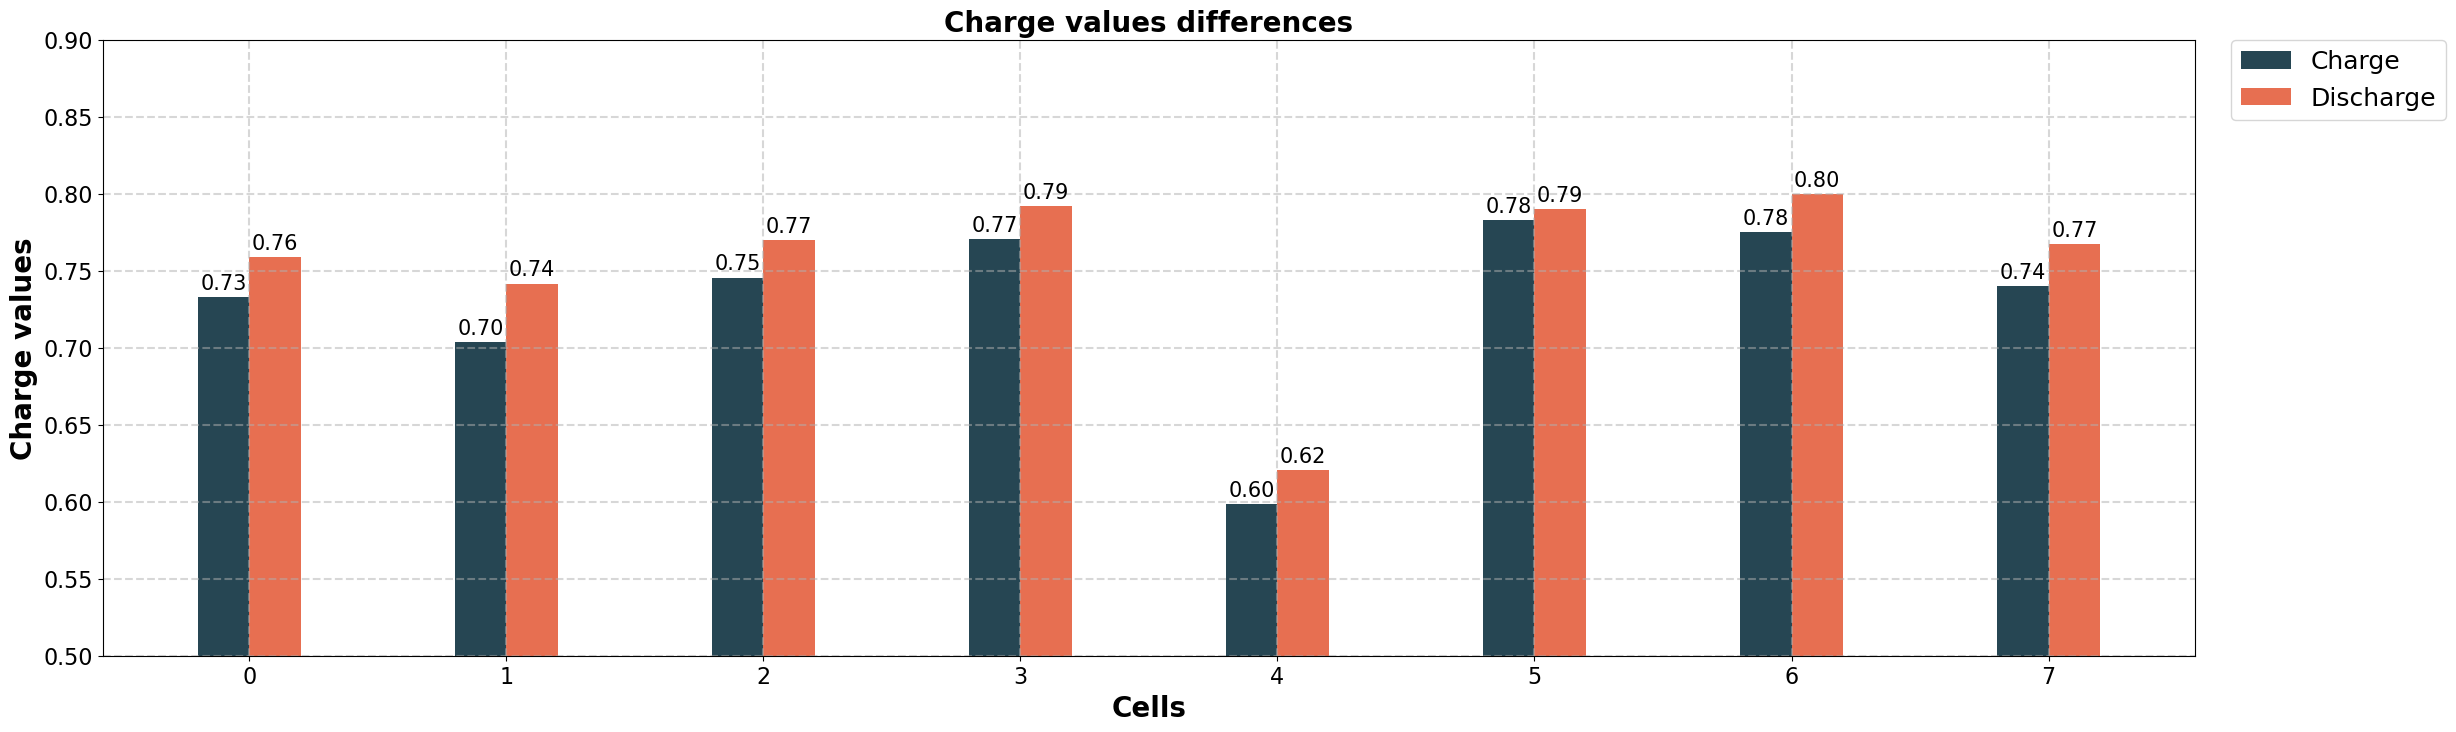

In [8]:
plotting_results(cells, q_charge_differences, q_discarge_differences, [0.5, 0.9])

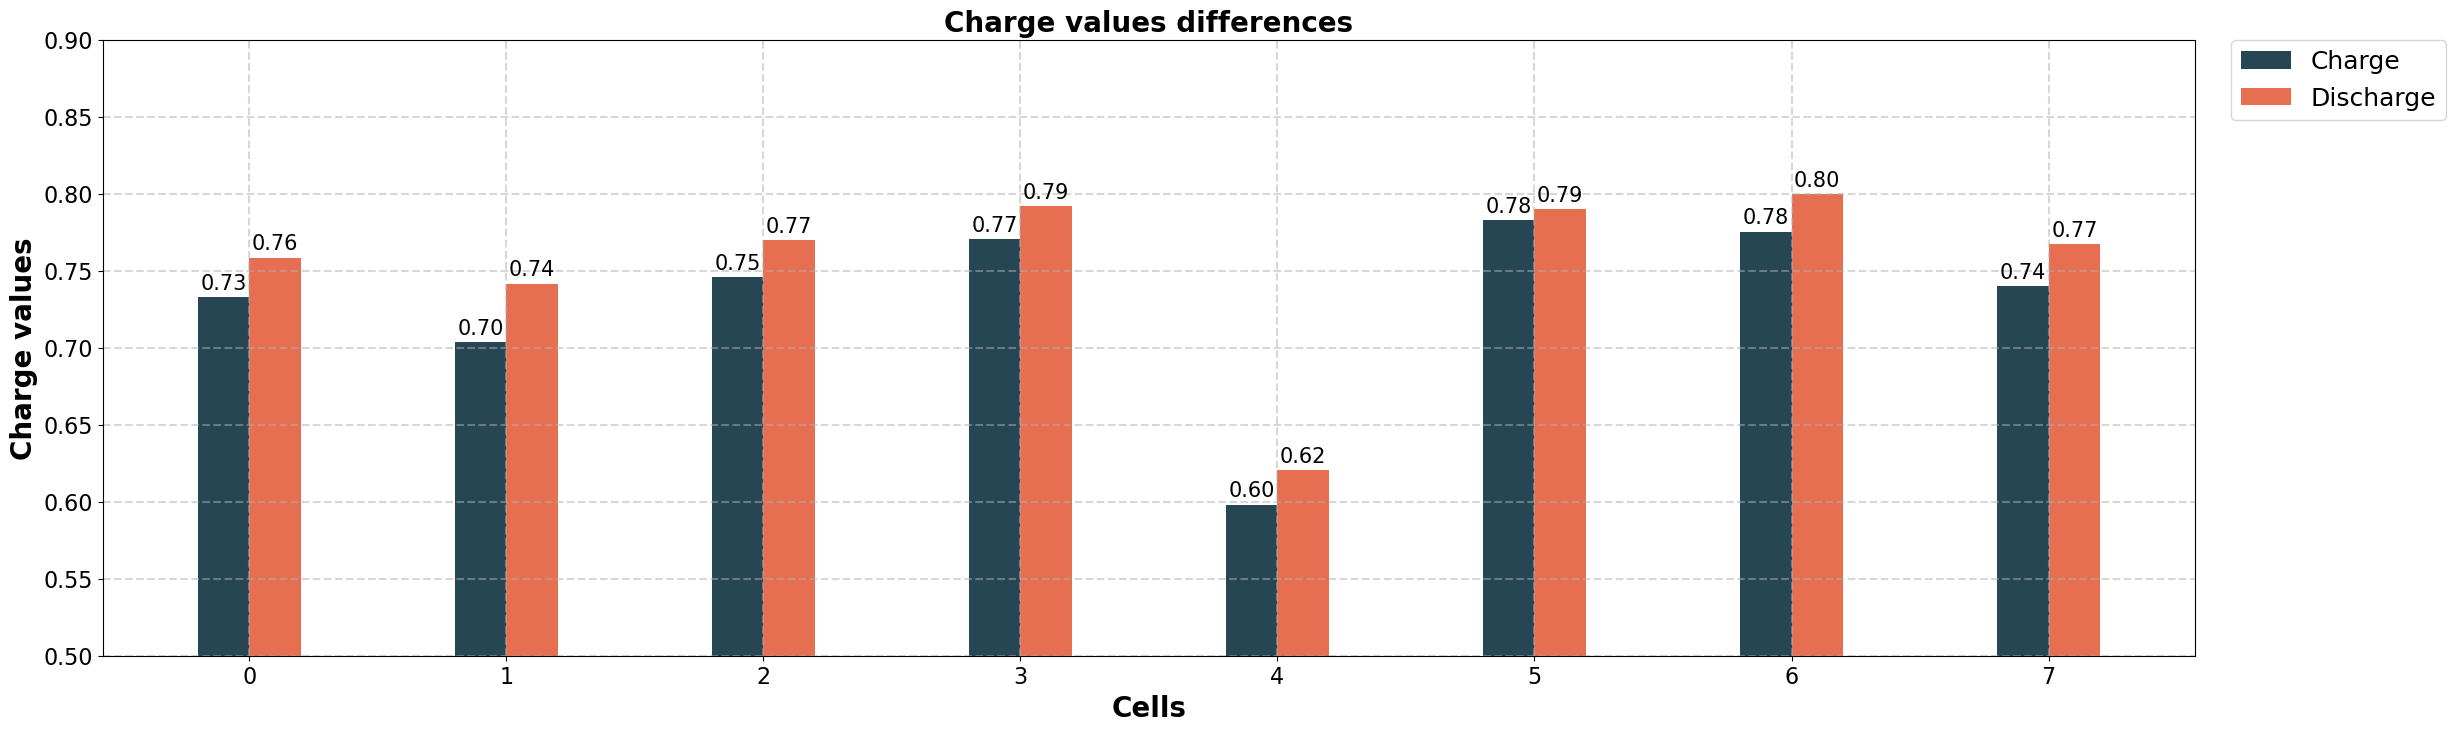

In [68]:
q_charge_differences, q_discarge_differences = begin_end_percent_without_difference('q',0), begin_end_percent_without_difference('q',1)
plotting_results(cells, q_charge_differences, q_discarge_differences, [0.5, 0.9])

### **Plot 2**

In [16]:
df_list_charge, df_list_discharge = csv_selector(csvv = 0, batery = 1), csv_selector(csvv = 1, batery = 1)
time_diference_charge, time_diference_discharge = [x.t[len(x)-1] - x.t[0] for x in df_list_charge], [x.t[len(x)-1] - x.t[0] for x in df_list_discharge]

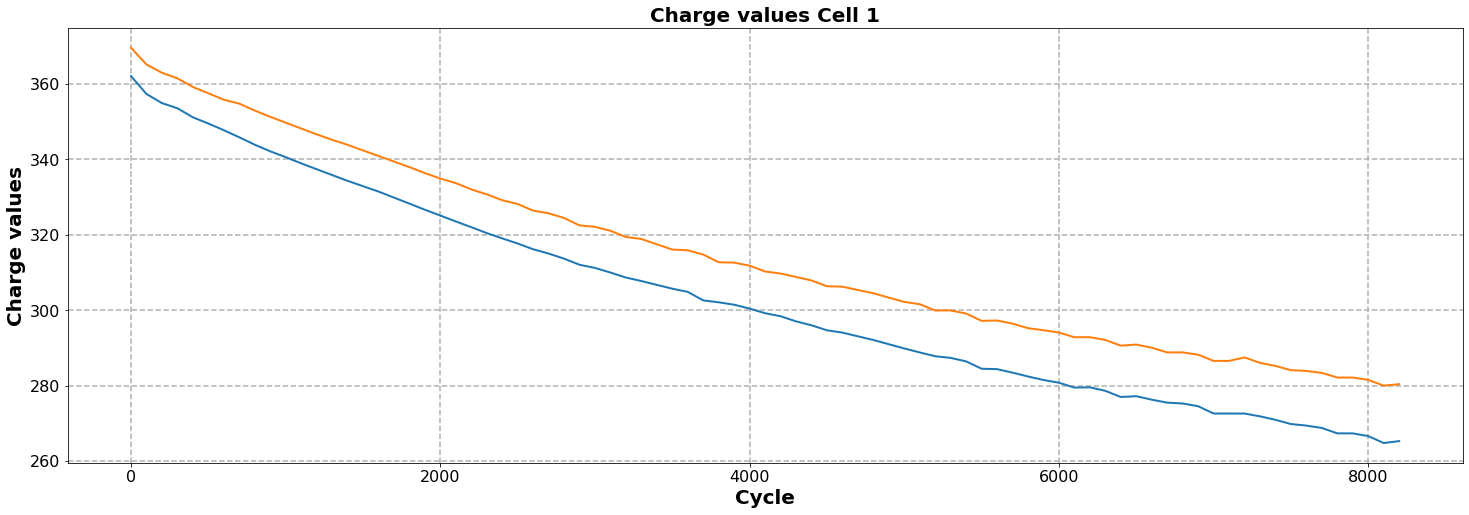

In [33]:
q_values, q_disvalues = [x.q.mean() for x in df_list_charge], [x.q.mean() for x in df_list_discharge]
cycle_value = sorted(list(rutes(batery = 1)[0].values()))

fig = plt.figure(figsize=(25, 8))
plt.plot(cycle_value,q_values, linewidth=2)
plt.plot(cycle_value,np.abs(q_disvalues), linewidth=2)
plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5);
plt.xlabel('Cycle', fontdict=font), plt.ylabel('Charge values', fontdict=font),  plt.title(f'Charge values Cell 1', fontdict=font);

### **Plot 3**

In [43]:
def plotting_time_difference(dff = charge_every_cell, title = 'Charge', legend_num = 1):
    fig = plt.figure(figsize=(25, 8))
    for k, i in enumerate(dff):
        time_diference_charge = [x.t[len(x)-1] - x.t[0] for x in i]
        cycle_value = sorted(list(rutes(batery = k+1)[0].values()))
        plt.plot(cycle_value, time_diference_charge, label=f"{title} cell {k+1}", linewidth=2)
    plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5);
    plt.xlabel('Cycle', fontdict=font), plt.ylabel('Tine difference', fontdict=font),  plt.title(f'Time diference by cycle', fontdict=font);
    plt.legend(loc='upper right', fontsize=18, bbox_to_anchor=(legend_num,1), borderaxespad=0);

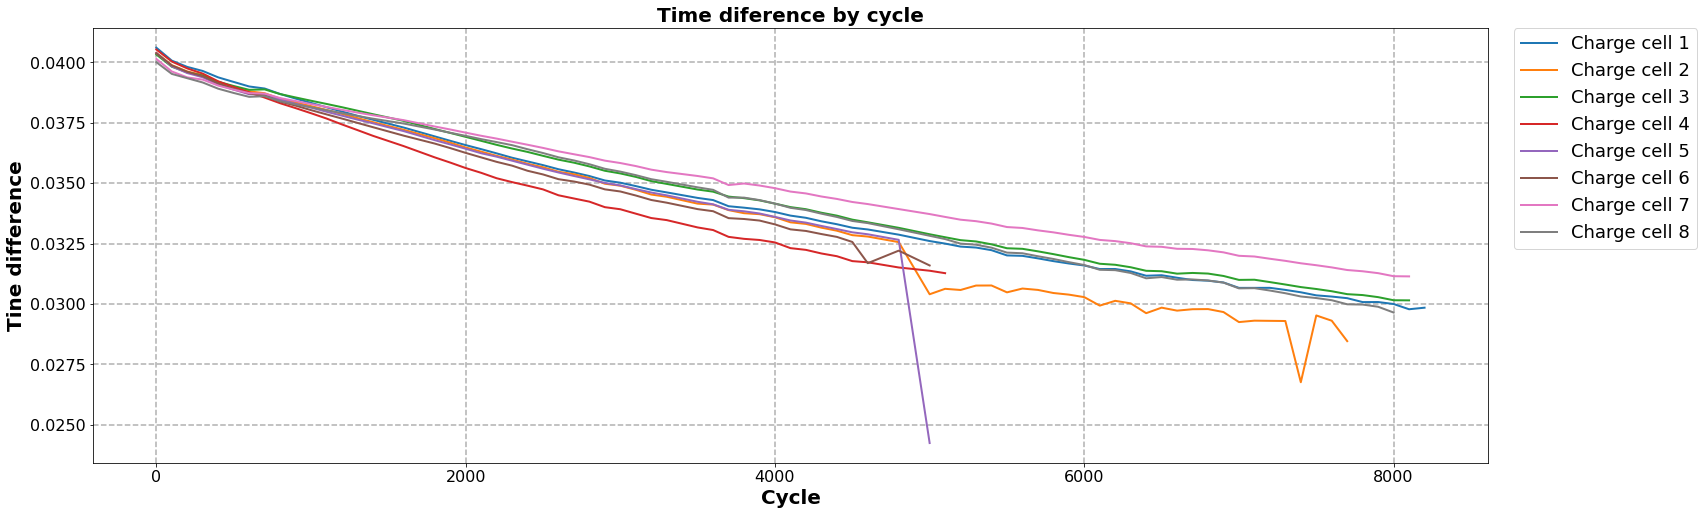

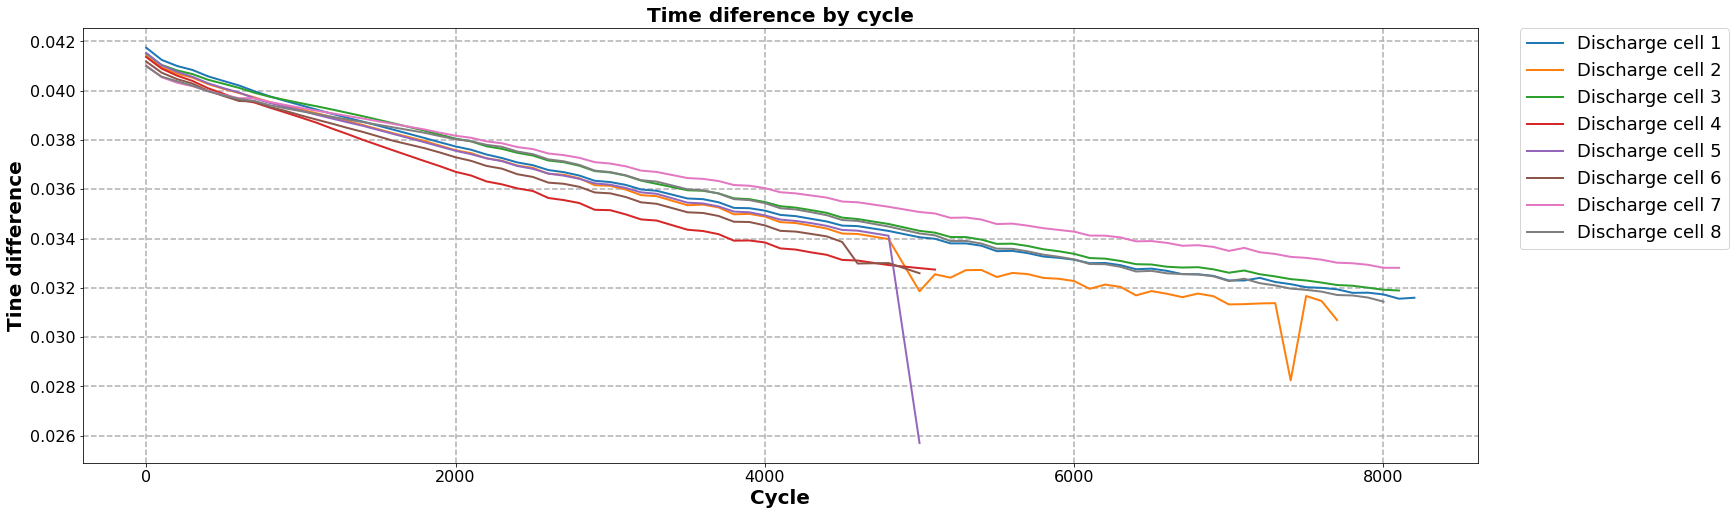

In [44]:
plotting_time_difference(charge_every_cell, 'Charge', 1.15)
plotting_time_difference(discharge_every_cell, 'Discharge', 1.18)

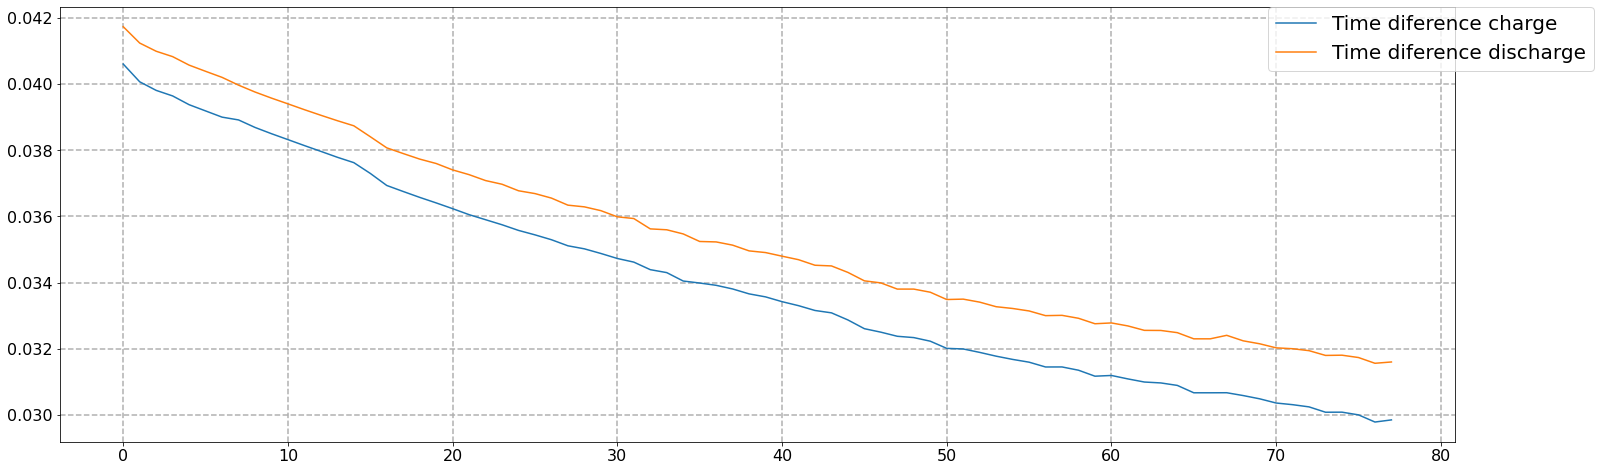

In [97]:
fig = plt.figure(figsize=(25, 8))
plt.plot(range(len(time_diference_charge)), time_diference_charge, label="Time diference charge")
plt.plot(range(len(time_diference_discharge)), time_diference_discharge, label="Time diference discharge")

plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5);
plt.legend(loc='upper right', fontsize=20, bbox_to_anchor=(1.1,1), borderaxespad=0);

### Cell with cycle dataframe creation
---

In [26]:
discharge_every_cell[0][-1]

,t,v,q,T,SoC
0,736593.428085,4.183829,0.000000,40.263599,-0.717022
1,736593.428096,4.153793,-0.195199,40.213692,-0.717022
2,736593.428108,4.151748,-0.400544,40.213692,-0.717022
3,736593.428119,4.149582,-0.605890,40.238625,-0.717022
4,736593.428131,4.148098,-0.811235,40.213692,-0.717022
...,...,...,...,...,...
2727,736593.459647,2.754049,-560.022097,41.324600,-0.717022
2728,736593.459659,2.737487,-560.227466,41.362038,-0.717022
2729,736593.459670,2.719722,-560.432836,41.349533,-0.717022
2730,736593.459682,2.701035,-560.638205,41.349533,-0.717022


In [27]:
charge_every_cell[0][0]

,t,v,q,T,SoC
0,735954.858966,2.719213,-0.000049,41.295536,-0.978542
1,735954.858977,2.856135,0.206339,41.000046,-0.978542
2,735954.858989,2.877108,0.412724,40.962608,-0.978542
3,735954.859000,2.892908,0.619110,40.987579,-0.978542
4,735954.859012,2.906382,0.825497,41.049992,-0.978542
...,...,...,...,...,...
3505,735954.899533,4.198614,723.364384,40.126312,-0.978542
3506,735954.899544,4.198935,723.570663,40.088875,-0.978542
3507,735954.899556,4.199336,723.776940,40.101341,-0.978542
3508,735954.899567,4.199536,723.983220,40.151283,-0.978542


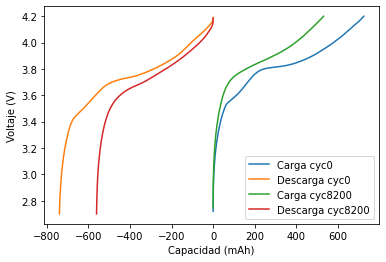

In [20]:
plt.plot(df0c.q, df0c.v, label="Carga cyc0")
plt.plot(df0d.q, df0d.v, label="Descarga cyc0")
plt.plot(df8200c.q, df8200c.v, label="Carga cyc8200")
plt.plot(df8200d.q, df8200d.v, label="Descarga cyc8200")
plt.xlabel("Capacidad (mAh)"), plt.ylabel("Voltaje (V)"), plt.legend();